In [745]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import seaborn as sns
sns.set_style("ticks")


def fillpretty(x,y,yerr,ax):
    ax.fill_between(x,np.maximum(0,y-yerr),y+yerr,alpha=0.5)
prop = lambda a, astd, b, bstd: np.sqrt((astd/a)**2+(bstd/b)**2)
    

Find best T

In [128]:
def findnum(a):
    for i in range(int(a/2+3)):
        if a%(int(a/2+3)-i) == 0:
            return (int(a/2+3)-i)
        

Text(0.5, 1.0, 'Fastest T as a function of matrix size')

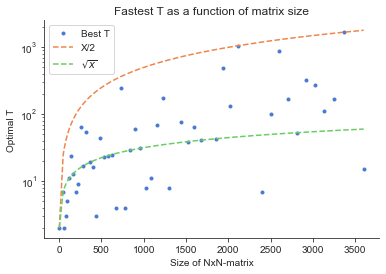

In [447]:
dat = np.genfromtxt("exam-handout/finding_T_2.csv",delimiter = ",",skip_header = 1,dtype=int)

x = dat[:,0][dat[:,1] != 1]
y = dat[:,1][dat[:,1] != 1]

plt.plot(x,y,'.',label = "Best T")
# plt.plot(x,y,alpha =0.1,color="blue")

# plt.plot(dat[:,0],[findnum(d) for d in dat[:,0]],'.')
# plt.plot(dat[:,0],np.sqrt(dat[:,0]))
plt.plot(x,x/2,'--',label="X/2")
plt.plot(x,np.sqrt(x),'--',label="$\sqrt{x}$")
plt.legend()
plt.yscale("log")

plt.xlabel("Size of NxN-matrix")
plt.ylabel("Optimal T")
sns.despine()
plt.title("Fastest T as a function of matrix size")

In [101]:
# [(d,math.gcd(d,d)) for d in dat[:,1]]
dat[:,1]

array([ 1,  1,  3,  1,  1,  2,  7,  2,  3, 10, 11,  8, 13,  2,  5, 16, 17,
       18, 19, 16, 21, 11,  1, 24,  5, 26, 27, 28, 29, 25,  1,  2,  9,  2,
       35,  3, 37,  4, 39, 32, 41,  6,  1, 16, 25,  2,  1, 16,  1, 25, 51,
       13,  1,  9, 25, 49, 57,  4, 59, 24,  1, 31,  1,  4,  5])

Times at different T's for fixed size 

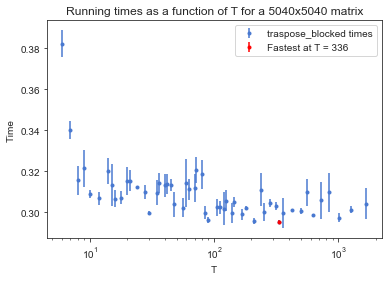

In [448]:
dat = np.genfromtxt(f"exam-handout/times_for_T_for_5040_5runs.csv",delimiter = ",",skip_header = 1,dtype=float)


X = dat[6:,0].astype(int)
Y = dat[6:,1:]

Y_m = np.mean(Y,axis=1)
Y_std = np.std(Y,axis=1)

X = X[Y_m!=-1]
Y_std = Y_std[Y_m!=-1]
Y_m = Y_m[Y_m!=-1]



fig, ax = plt.subplots()
# fillpretty(X,Y_m,Y_std,ax)
ax.errorbar(X,Y_m,yerr=Y_std,fmt = ".",label = "traspose_blocked times")
_min = np.argmin(Y_m+Y_std)
ax.errorbar(X[_min],Y_m[_min],yerr=Y_std[_min],fmt = ".",color="red",label = f"Fastest at T = {X[_min]}")

# plt.ylim(0.29,0.34)
# plt.xlim(0,100)
ax.set_xscale("log")

ax.legend()

plt.title("Running times as a function of T for a 5040x5040 matrix")
ax.set_ylabel("Time ")
ax.set_xlabel("T")
# sns.despine()
plt.show()

# ax.vlines(X[_min],0.3,0.34)
# plt.vlines(np.sqrt(5040),0,4)
# math.gcd(5040,5040)

Transpose

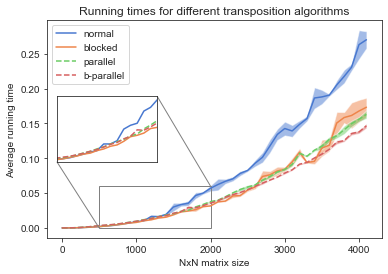

In [716]:


dat = np.genfromtxt("exam-handout/transpose_T_100.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_times_normal = np.mean(times,axis = 1)
std_times_normal = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/transpose_blocked_T_100.csv",delimiter = ",",skip_header = 1)

sizes100 = dat[:,0].astype(int)
times = dat[:,1:]

avg_times_blocked = np.mean(times,axis = 1)
std_times_blocked = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/transpose_parallel_T_100_4_cores.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_times_parallel = np.mean(times,axis = 1)
std_times_parallel = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/transpose_blocked_parallel_T_100_4_cores.csv",delimiter = ",",skip_header = 1)

sizes100 = dat[:,0].astype(int)
times = dat[:,1:]

avg_times_blocked_parallel = np.mean(times,axis = 1)
std_times_blocked_parallel = np.std(times,axis = 1)




# plt.errorbar(sizes,avg_times,yerr = std_times,fmt=".")
# plt.

fig, ax = plt.subplots()

fillpretty(sizes,avg_times_normal,std_times_normal,ax)
ax.plot(sizes,avg_times_normal,ls='-',label = "normal")

fillpretty(sizes100,avg_times_blocked,std_times_blocked,ax)
ax.plot(sizes100,avg_times_blocked,ls='-',label = "blocked")

fillpretty(sizes,avg_times_parallel,std_times_parallel,ax)
ax.plot(sizes,avg_times_parallel,ls='--',label = "parallel")

fillpretty(sizes100,avg_times_blocked_parallel,std_times_blocked_parallel,ax)
ax.plot(sizes100,avg_times_blocked_parallel,ls='--',label = "b-parallel")
ax.legend(loc="upper left")

axins = inset_axes(ax,  "30%", "30%" ,loc="center left", borderpad=1)

axins.plot(sizes,avg_times_normal,ls='-',label = "normal")
axins.plot(sizes100,avg_times_blocked,ls='-',label = "blocked")
axins.plot(sizes,avg_times_parallel,ls='--',label = "parallel")
axins.plot(sizes100,avg_times_blocked_parallel,ls='--',label = "blocked-parallel")

axins.set_xticks([])
axins.set_yticks([])

axins.set_xlim(500,2000)
axins.set_ylim(-0.0,0.06)

mark_inset(ax,axins,1,3,color = "black",fc="none", ec="0.5")

# ax.set_yscale("log")
# sns.despine()
ax.set_title("Running times for different transposition algorithms")
ax.set_xlabel("NxN matrix size")
ax.set_ylabel("Average running time")

plt.show()

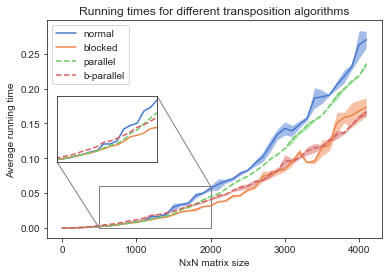

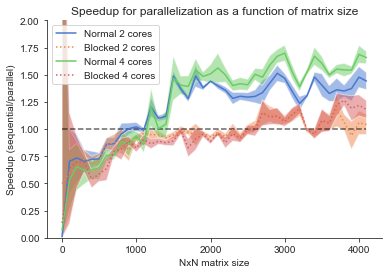

In [729]:
dat = np.genfromtxt("exam-handout/transpose_parallel_T_100_2_cores.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

parallel_2 = np.mean(times,axis = 1)
std_parallel_2 = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/transpose_blocked_parallel_T_100_2_cores.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

parallel_blocked2 = np.mean(times,axis = 1)
std_parallel_blocked2 = np.std(times,axis = 1)

speedup_normal = avg_times_normal/avg_times_parallel
speedup_blocked = avg_times_blocked/avg_times_blocked_parallel

speedup_normal2 = avg_times_normal/parallel_2
speedup_blocked2 = avg_times_blocked/parallel_blocked2


speedup_normal_std = np.sqrt((std_times_normal/avg_times_normal)**2+(std_times_parallel/avg_times_parallel)**2)
speedup_blocked_std = np.sqrt((std_times_blocked/avg_times_blocked)**2+(std_times_blocked_parallel/avg_times_blocked_parallel)**2)

speedup_std2 = np.sqrt((std_times_blocked/avg_times_blocked)**2+(std_parallel_2/parallel_2)**2)
speedup_std_blocked2 = np.sqrt((std_times_blocked/avg_times_blocked)**2+(std_parallel_blocked2/parallel_blocked2)**2)



fig, ax = plt.subplots()

fillpretty(sizes,speedup_normal2,speedup_std2,ax)
plt.errorbar(sizes,speedup_normal2,label="Normal 2 cores")


fillpretty(sizes,speedup_blocked2,speedup_std_blocked2,ax)
plt.errorbar(sizes,speedup_blocked2,label="Blocked 2 cores",ls = ":")
# plt.plot(sizes[1:],speedup_blocked[1:])


fillpretty(sizes,speedup_normal,speedup_normal_std,ax)
plt.errorbar(sizes,speedup_normal,label="Normal 4 cores")



fillpretty(sizes,speedup_blocked,speedup_blocked_std,ax)
plt.errorbar(sizes,speedup_blocked,label="Blocked 4 cores",ls = ":")



ax.hlines(1,min(sizes),max(sizes),ls='--',color ="black",alpha = 0.6)

ax.set_ylim(0,2)
sns.despine()
plt.legend()

ax.set_title("Speedup for parallelization as a function of matrix size")
ax.set_xlabel("NxN matrix size")
ax.set_ylabel("Speedup (sequential/parallel)")

plt.show()


Matmul

In [770]:
dat = np.genfromtxt("exam-handout/matmul_100.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_normal = np.mean(times,axis = 1)
std_normal = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_locality_100.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_locality = np.mean(times,axis = 1)
std_locality = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_parallel_100.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_parallel = np.mean(times,axis = 1)
std_parallel = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_transpose_100.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_transpose = np.mean(times,axis = 1)
std_transpose = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_transpose_parallel_100.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_transpose_parallel = np.mean(times,axis = 1)
std_transpose_parallel = np.std(times,axis = 1)


dat = np.genfromtxt("exam-handout/matmul_locality_parallel_100.csv",delimiter = ",",skip_header = 1)

sizes = dat[:,0].astype(int)
times = dat[:,1:]

avg_locality_parallel = np.mean(times,axis = 1)
std_locality_parallel = np.std(times,axis = 1)


matmuls = [avg_normal,avg_locality,avg_transpose,avg_parallel,avg_transpose_parallel,avg_locality_parallel]
matmul_stds = [std_normal,std_locality,std_transpose_parallel,std_parallel,std_transpose,std_locality_parallel]
matmul_names = ["normal","locality","transpose","parallel","transpose parallel","locality parallel"]


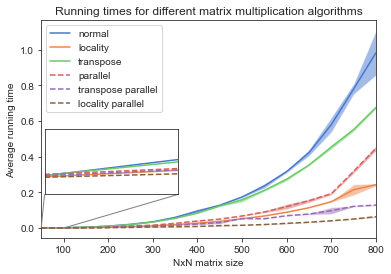

In [771]:
fig, ax = plt.subplots()


axins = ax.inset_axes((0.01,0.2,0.4,0.3))

for mm, std, name in zip(matmuls,matmul_stds,matmul_names):
    fillpretty(sizes,mm,std,ax)
    ls = "--" if "parallel" in name else "-"
    ax.plot(sizes,mm,ls=ls,label = name)
    axins.plot(sizes,mm,ls=ls)
    

    
axins.set_xticks([])
axins.set_yticks([])

axins.set_xlim(50,100)
axins.set_ylim(-0.001,0.003)

mark_inset(ax,axins,4,3,color = "black",fc="none", ec="0.5")

ax.set_xlim(50,800)

ax.legend(loc="upper left")

ax.set_title("Running times for different matrix multiplication algorithms")
ax.set_xlabel("NxN matrix size")
ax.set_ylabel("Average running time")

# fig.savefig("/plots/pngtest.pdf", bbox_inches='tight')
plt.show()

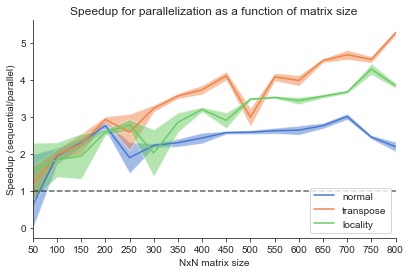

In [773]:
matmul_speedups = [avg_normal/avg_parallel,avg_transpose/avg_transpose_parallel,avg_locality/avg_locality_parallel]


matmul_speedups_stds = [prop(avg_normal,std_normal,avg_parallel,std_parallel),
                       prop(avg_transpose,std_transpose,avg_transpose_parallel,std_transpose_parallel),
                       prop(avg_locality,std_locality,avg_locality_parallel,std_locality_parallel)]

speedup_blocked = avg_times_blocked/avg_times_blocked_parallel

speedup_normal_std = np.sqrt((std_times_normal/avg_times_normal)**2+(std_times_parallel/avg_times_parallel)**2)
speedup_blocked_std = np.sqrt((std_times_blocked/avg_times_blocked)**2+(std_times_blocked_parallel/avg_times_blocked_parallel)**2)


fig, ax = plt.subplots(figsize=(6.5,4))

for speed, std, name in zip(matmul_speedups,matmul_speedups_stds,["normal","transpose","locality"]):
    fillpretty(sizes,speed,std,ax)
    plt.errorbar(sizes,speed,label=name)

ax.hlines(1,min(sizes),max(sizes),ls='--',color ="black",alpha = 0.6)
plt.legend(loc = "lower right")

ax.set_title("Speedup for parallelization as a function of matrix size")
ax.set_xlabel("NxN matrix size")
ax.set_ylabel("Speedup (sequential/parallel)")

ax.set_xlim(50,800)
ax.set_xticks([50*(i+1) for i in range(16)])
sns.despine()

Check scaling

In [651]:
dat = []

for i in range(64):
    d = np.genfromtxt(f"MODI/{i+1}.csv",delimiter = ",",skip_header = 1)
    dat.append(d)
    

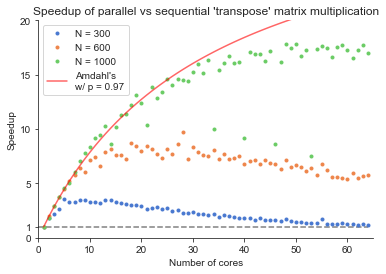

In [656]:
Amdahl = lambda p, N: 1/((1-p) + p/N)

Gustadson = lambda s, N: N + (1-N)*s

y = []
for i,d in enumerate(dat):
    y.append(d[:,1]/d[:,2])

y = np.array(y).T
x = np.array([i for i in range(1,len(y.T)+1)])

for size, speed in zip(dat[0][:,0],y):
    if size == 20 or size == 100:
        continue
    plt.plot(x, speed,'.',label = f"N = {int(size)}")
    

plt.plot(x, Amdahl(0.97,x),'-',label = "Amdahl's\nw/ p = 0.97",color="red",alpha = 0.6)
# plt.plot(x, Gustadson(0.2,x),label = "Gustadson's")


# # plt.legend()
plt.xlim(0,65)

plt.yticks([0,1,10,20,30,40,50])

plt.legend()

plt.hlines(1,0,64,color="black",alpha = 0.5,ls = "--")

plt.yticks([0,1,5,10,15,20])
plt.ylim(0,20)

plt.xlabel("Number of cores")
plt.ylabel("Speedup")
plt.title("Speedup of parallel vs sequential 'transpose' matrix multiplication")
sns.despine()
plt.show()
